In [ ]:
# Data preprocessing

from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

diabetes = load_diabetes()

features = diabetes.feature_names
print("Feature Names: ",diabetes.feature_names, '\n')
#print(diabetes.DESCR)

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target)

Feature Names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 



In [ ]:
# Diabetes data set preprocessing - checking for unique and missing values
# printting the number of unique values of each
print("\nName of the feature and their unique values:")
for i in diabetes.feature_names:
    #pd.unique(X[i])
    print([i], X[i].nunique())


# missing values
missing_values = X.isnull().sum(axis=0)
print("\nMissing values for input data set: \n",missing_values)

# missing values in the target dataset
missing_values = y.isnull().sum(axis=0)
print("\nMissing values for target data set\n",missing_values)


Name of the feature and their unique values:
['age'] 58
['sex'] 2
['bmi'] 163
['bp'] 100
['s1'] 141
['s2'] 302
['s3'] 63
['s4'] 66
['s5'] 184
['s6'] 56

Missing values for input data set: 
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values for target data set
 0    0
dtype: int64


In [ ]:
# splitting to Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(353, 10) (353, 1) (89, 10) (89, 1)


In [ ]:
# linear regression class
class Linear_regression:
    def __init__(self, learning_rate=0.001, n_iter=750, bias=True):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.bias = bias
        self.weights = None
        self.losses = []

    def fit(self, X, y):
        if self.bias:
            # Add a column of ones for the bias term
            ones = np.ones((X.shape[0], 1))
            X = np.append(ones, X, axis=1)  # Append a column of ones to X

        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))

        for i in range(self.n_iter):
            y_pred = np.dot(X, self.weights)
            gradient = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            self.weights -= gradient * self.learning_rate
            mse_loss = np.mean((y_pred - y) ** 2, axis=0)
            self.losses.append(mse_loss)

    def predict(self, X):
        if self.bias:
            ones = np.ones((X.shape[0], 1))
            X = np.append(ones, X, axis=1)  # Append a column of ones to X
        return np.dot(X, self.weights)

In [ ]:
# Linear Regression
linear_model = Linear_regression(bias=True, learning_rate = 0.5, n_iter = 750)
linear_model.fit(x_train,y_train)

# calculating the R2 score for the linear model
# R2 score is calculated based on the performance on unseen data
from sklearn.metrics import r2_score
y_linear_pred = linear_model.predict(x_test)
linear_r2_score = r2_score(y_test, y_linear_pred)
print(f"Linear model R2 score: {linear_r2_score}")


# finding the optimal numbers for n_iter and learning rate using exhaustive search
n_iters = [500, 750, 1000, 1500, 3000, 10000]
learning_rates = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
max_r2 = -1
optimal_learning_rate = -1
optimal_n_iteration = -1
loop_counter = 1
for n_iter in n_iters:
    for learning_rate in learning_rates:
        # create a model with different combinations
        linear_model = Linear_regression(bias=True, learning_rate = learning_rate, n_iter = n_iter)
        linear_model.fit(x_train,y_train)

        # Evalueate the performance of the model
        y_linear_pred = linear_model.predict(x_test)
        linear_r2_score = r2_score(y_test, y_linear_pred)
        print(f"{loop_counter}. Linear model R2 score: {linear_r2_score}\tn_iter: {n_iter}\tl_rate: {learning_rate}")
        loop_counter += 1

        # finding the best performing model
        if(linear_r2_score > max_r2):
            max_r2 = linear_r2_score
            optimal_learning_rate = learning_rate
            optimal_n_iter = n_iter
print(f"The best performing model has r2 score of {max_r2:.5f}, with n_iter={optimal_n_iter} and learning rate={optimal_learning_rate} ")




Linear model R2 score: 0.5122256522668367
1. Linear model R2 score: 0.47391669991863195	n_iter: 500	l_rate: 0.4
2. Linear model R2 score: 0.4903907809823729	n_iter: 500	l_rate: 0.5
3. Linear model R2 score: 0.5015803888908227	n_iter: 500	l_rate: 0.6
4. Linear model R2 score: 0.5093079762136759	n_iter: 500	l_rate: 0.7
5. Linear model R2 score: 0.5147140779912529	n_iter: 500	l_rate: 0.8
6. Linear model R2 score: 0.518540848799617	n_iter: 500	l_rate: 0.9
7. Linear model R2 score: 0.5015560597410383	n_iter: 750	l_rate: 0.4
8. Linear model R2 score: 0.5122256522668367	n_iter: 750	l_rate: 0.5
9. Linear model R2 score: 0.518522007595204	n_iter: 750	l_rate: 0.6
10. Linear model R2 score: 0.5223328889707846	n_iter: 750	l_rate: 0.7
11. Linear model R2 score: 0.5246922324852439	n_iter: 750	l_rate: 0.8
12. Linear model R2 score: 0.5261820102874664	n_iter: 750	l_rate: 0.9
13. Linear model R2 score: 0.5146826553505734	n_iter: 1000	l_rate: 0.4
14. Linear model R2 score: 0.5212545224559615	n_iter: 100

In [ ]:
# polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4, 5, 6]
for degree in degrees:
  poly_reg = PolynomialFeatures(degree=degree)
  X_poly_train = poly_reg.fit_transform(x_train)
  lin_reg_model = LinearRegression()
  lin_reg_model.fit(X_poly_train, y_train)
  y_pred_poly = lin_reg_model.predict(X_poly_train)
  #calculating the R2 score for the current model
  r2 = r2_score(y_train, y_pred_poly)
  print(f"Polynomial model degree {degree}      R2 score:{r2}")

print(f"The best performing polynomial model has r2 score:0.6160179375256238 with degree 2")


Polynomial model degree 2      R2 score:0.6160179375256238
Polynomial model degree 3      R2 score:0.28504644928138667
Polynomial model degree 4      R2 score:1.0
Polynomial model degree 5      R2 score:1.0
Polynomial model degree 6      R2 score:1.0
The best performing polynomial model has r2 score:0.6160179375256238 with degree 2


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

sigma = 1

rbf_kernel = RBF(length_scale=sigma)


# gaussian model
gaussian_regression = GaussianProcessRegressor(kernel=rbf_kernel, random_state=10).fit(x_train, y_train)

# getting the model r2 score
score = gaussian_regression.score(x_test, y_test)
print(f"Gaussian Regression R2 score: {score}")

Gaussian Regression R2 score: -3.5525548472726216


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
# trying different parameters for the gaussian regression
sigma_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100]

max_r2 = -10
optimal_sigma = -10
loop_counter = 1

for sigma in sigma_values:
        # creating different gaussian regression models
        rbf_kernel = RBF(length_scale=sigma)
        gaussian_regression = GaussianProcessRegressor(kernel=rbf_kernel, random_state=0).fit(x_train, y_train)

        y_pred = gaussian_regression.predict(x_test)

        # evaluate the performance of the model using R2 score
        r2 = r2_score(y_test, y_pred)
        print(f"{loop_counter}. Gaussian model R2 score: {r2:.5f}\tsigma: {sigma}")
        loop_counter += 1


        if r2 > max_r2:
            max_r2 = r2
            optimal_sigma = sigma


print(f"The best performing Gaussain model has R2 score of {max_r2}, with sigma={optimal_sigma}")



1. Gaussian model R2 score: -0.58017	sigma: 0.01
2. Gaussian model R2 score: -3.55255	sigma: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


3. Gaussian model R2 score: -3.55255	sigma: 0.5
4. Gaussian model R2 score: -3.55255	sigma: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


5. Gaussian model R2 score: -3.55255	sigma: 5.0
6. Gaussian model R2 score: -3.55255	sigma: 10.0


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


7. Gaussian model R2 score: -3.55255	sigma: 50.0
8. Gaussian model R2 score: -3.55255	sigma: 100
The best performing Gaussain model has R2 score of -0.580169491660363, with sigma=0.01


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
features = breast_cancer.feature_names
print("Feature names",features)

X_cancer = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
X_cancer.head()
Y_cancer = pd.DataFrame(breast_cancer.target)
Y_cancer.head()


# Data preprocess - checking for missing values
cancer_missingData = X_cancer.isnull().sum(axis=0)
cancer_missingTarget= Y_cancer.isnull().sum(axis=0)

print("Data missing values \n", cancer_missingData, '\n\n')
print("Target missing values \n", cancer_missingTarget)

Feature names ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Data missing values 
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smo

In [ ]:
# splitting breast cancer data into train and test
x_cancer_train, x_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, Y_cancer, test_size=0.2, random_state=10)
print(x_cancer_train.shape, y_cancer_train.shape, x_cancer_test.shape, y_cancer_test.shape)

(455, 30) (455, 1) (114, 30) (114, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


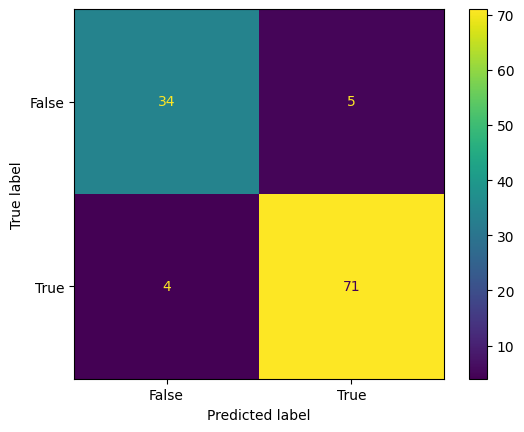

In [ ]:
# KNN classifer on breast cancer data
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_model = KNeighborsClassifier(n_neighbors=5)
knn_classifier_model.fit(x_cancer_train, y_cancer_train)

y_cancer_pred = knn_classifier_model.predict(x_cancer_test)

# plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_cancer_test, y_cancer_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [ ]:
# calculating scores
accuracy = metrics.accuracy_score(y_cancer_test, y_cancer_pred)
precision = metrics.precision_score(y_cancer_test, y_cancer_pred)
sensitivity_recall = metrics.recall_score(y_cancer_test, y_cancer_pred)
specificity = metrics.recall_score(y_cancer_test, y_cancer_pred, pos_label=0)
f1_score = metrics.f1_score(y_cancer_test, y_cancer_pred)

print(f"Accuracy:\t{accuracy}\nPrecision:\t{precision}\nSensitivity/Recall:\t{sensitivity_recall}\nSpecificity:\t{specificity}\nF1 Score:\t{f1_score}")


Accuracy:	0.9210526315789473
Precision:	0.9342105263157895
Sensitivity/Recall:	0.9466666666666667
Specificity:	0.8717948717948718
F1 Score:	0.9403973509933775


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#######################################################
Model with k = 1


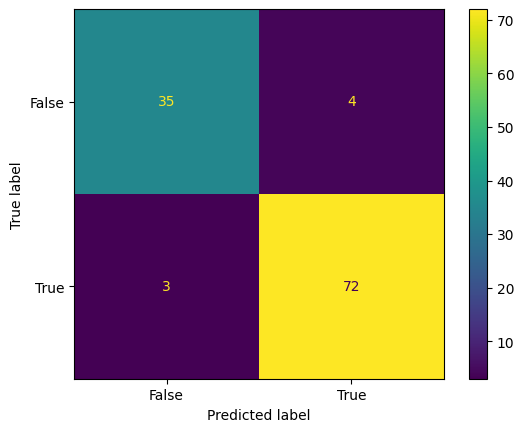



Accuracy:	0.9385964912280702
Precision:	0.9473684210526315
Sensitivity/Recall:	0.96
Specificity:	0.8974358974358975
F1 Score:	0.9536423841059603
#######################################################
Model with k = 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


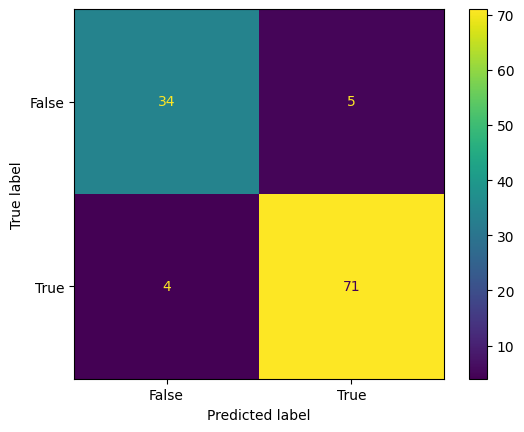



Accuracy:	0.9210526315789473
Precision:	0.9342105263157895
Sensitivity/Recall:	0.9466666666666667
Specificity:	0.8717948717948718
F1 Score:	0.9403973509933775


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#######################################################
Model with k = 5


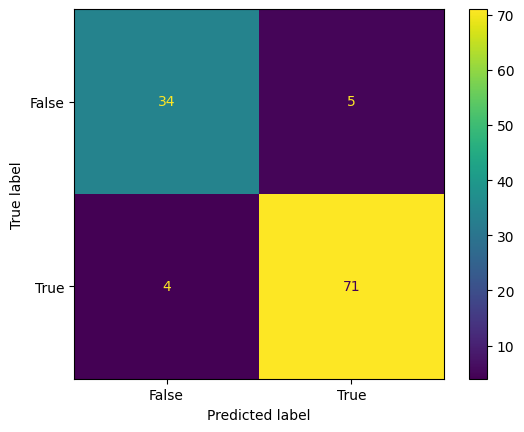



Accuracy:	0.9210526315789473
Precision:	0.9342105263157895
Sensitivity/Recall:	0.9466666666666667
Specificity:	0.8717948717948718
F1 Score:	0.9403973509933775


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#######################################################
Model with k = 7


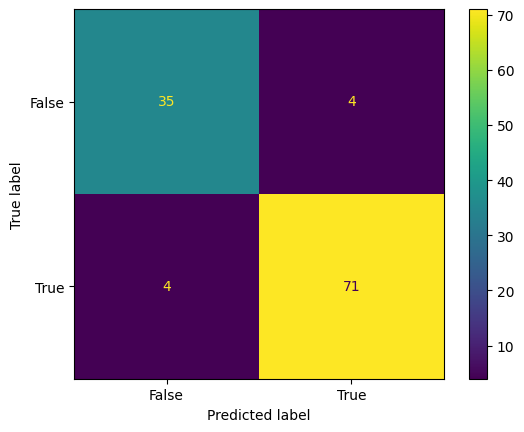



Accuracy:	0.9298245614035088
Precision:	0.9466666666666667
Sensitivity/Recall:	0.9466666666666667
Specificity:	0.8974358974358975
F1 Score:	0.9466666666666667
#######################################################
Model with k = 9


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


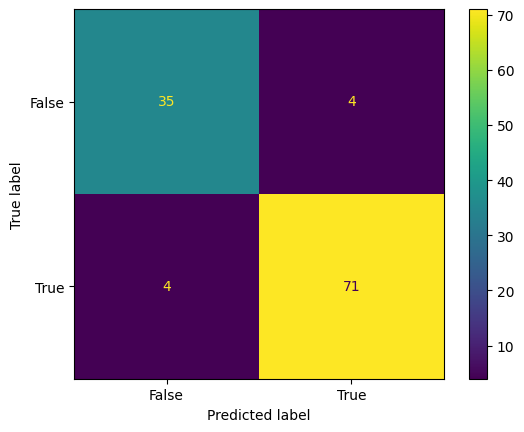



Accuracy:	0.9298245614035088
Precision:	0.9466666666666667
Sensitivity/Recall:	0.9466666666666667
Specificity:	0.8974358974358975
F1 Score:	0.9466666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#######################################################
Model with k = 11


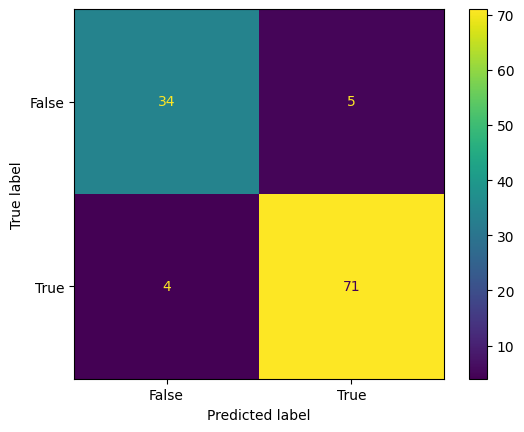



Accuracy:	0.9210526315789473
Precision:	0.9342105263157895
Sensitivity/Recall:	0.9466666666666667
Specificity:	0.8717948717948718
F1 Score:	0.9403973509933775


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#######################################################
Model with k = 13


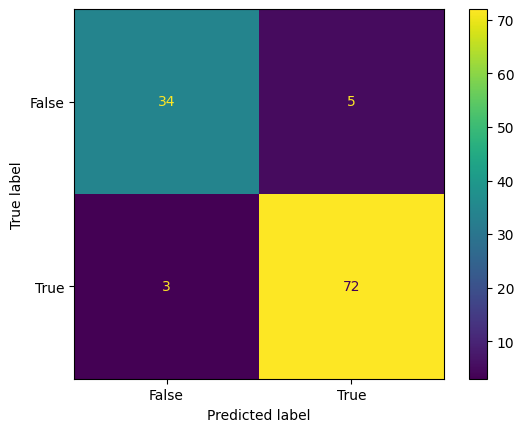



Accuracy:	0.9298245614035088
Precision:	0.935064935064935
Sensitivity/Recall:	0.96
Specificity:	0.8717948717948718
F1 Score:	0.9473684210526316


In [ ]:
# trying different k values
k_values = [1, 3, 5, 7, 9, 11, 13] # not using even numbers
for k_value in k_values:
    knn_classifier_model = KNeighborsClassifier(n_neighbors=k_value)
    knn_classifier_model.fit(x_cancer_train, y_cancer_train)
    y_cancer_pred = knn_classifier_model.predict(x_cancer_test)
    print("#######################################################")
    print(f"Model with k = {k_value}")
    # confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_cancer_test, y_cancer_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

    print("\n")
    # calculating scores
    accuracy = metrics.accuracy_score(y_cancer_test, y_cancer_pred)
    precision = metrics.precision_score(y_cancer_test, y_cancer_pred)
    sensitivity_recall = metrics.recall_score(y_cancer_test, y_cancer_pred)
    specificity = metrics.recall_score(y_cancer_test, y_cancer_pred, pos_label=0)
    f1_score = metrics.f1_score(y_cancer_test, y_cancer_pred)

    print(f"Accuracy:\t{accuracy}\nPrecision:\t{precision}\nSensitivity/Recall:\t{sensitivity_recall}\nSpecificity:\t{specificity}\nF1 Score:\t{f1_score}")







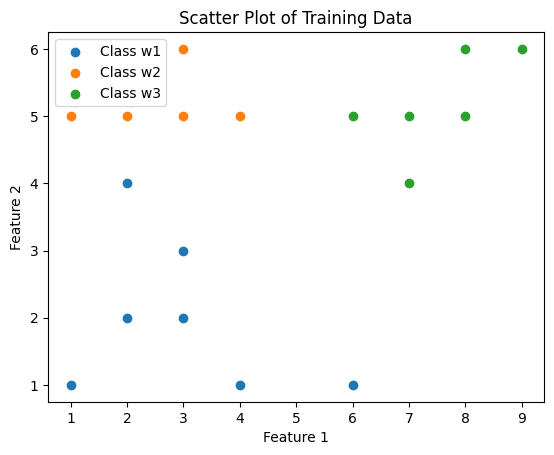

In [ ]:
# Problem 3
import matplotlib.pyplot as plt
import numpy as np


w1_training = np.array([[1, 1], [2, 2], [2, 4], [3, 2], [3, 3], [4, 1], [6, 1]])
w2_training = np.array([[1, 5], [2, 5], [3, 5], [3, 6], [4, 5]])
w3_training = np.array([[6, 5], [7, 4], [7, 5], [8, 5], [8, 6], [9, 6]])


plt.scatter(w1_training[:, 0], w1_training[:, 1], label='Class w1')
plt.scatter(w2_training[:, 0], w2_training[:, 1], label='Class w2')
plt.scatter(w3_training[:, 0], w3_training[:, 1], label='Class w3')

plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.show()


In [ ]:
def knn_classifier(x, w1_training, w2_training, w3_training, k):
    # distances from w1
    distances_w1 = [(euclidean_distance(x, w1_point), 1) for w1_point in w1_training]
    # distances from w2
    distances_w2 = [(euclidean_distance(x, w2_point), 2) for w2_point in w2_training]
    # distances from w3
    distances_w3 = [(euclidean_distance(x, w3_point), 3) for w3_point in w3_training]

    # combine all distances
    all_distances = distances_w1 + distances_w2 + distances_w3

    # sort by distance, keep first k elements
    sorted_distances = sorted(all_distances, key=lambda x: x[0])[:k]

    # count occurrences of each class in the k nearest neighbors
    counts = np.bincount([class_ for _, class_ in sorted_distances])

    # return class with most occurrences
    return np.argmax(counts)

# calling the function with arbitrary x - done with k = 5  neighbors
x = [2, 6]
predicted_label = knn_classifier(x, w1_training, w2_training, w3_training, 5)
print(f"Predicted label for x = {x}:", predicted_label)

x = [3, 3]
predicted_label = knn_classifier(x, w1_training, w2_training, w3_training, 5)
print(f"Predicted label for x = {x}:", predicted_label)

x = [8, 6]
predicted_label = knn_classifier(x, w1_training, w2_training, w3_training, 5)
print(f"Predicted label for x = {x}:", predicted_label)

Predicted label for x = [2, 6]: 2
Predicted label for x = [3, 3]: 1
Predicted label for x = [8, 6]: 3


In [ ]:
# part c
# model as a gaussian distribution
def get_mean(x_train):
  mean = np.mean(x_train, axis=0)
  return mean

def get_covariance(x_train):
  covariance = np.cov(x_train.T)
  return covariance

def get_pdf(x, mean, covariance):
    return 1 / (np.sqrt((2 * np.pi)**len(mean) * np.linalg.det(covariance))) * np.exp(-0.5 * (x - mean).T @ np.linalg.inv(covariance) @ (x - mean))

mean_w1 = get_mean(w1_training)
mean_w2 = get_mean(w2_training)
mean_w3 = get_mean(w3_training)

cov_w1 = get_covariance(w1_training)
cov_w2 = get_covariance(w2_training)
cov_w3 = get_covariance(w3_training)


# Bayesian Classifier
def bayesian_classifier(x, mean_w1, cov_w1, mean_w2, cov_w2, mean_w3, cov_w3):
    # Calculate the pdf of the point for each class
    p_w1 = get_pdf(x, mean_w1, cov_w1)
    p_w2 = get_pdf(x, mean_w2, cov_w2)
    p_w3 = get_pdf(x, mean_w3, cov_w3)

    # Return the class that has the maximum posterior probability
    return np.argmax([p_w1, p_w2, p_w3]) + 1

# calling the function with arbitrary x - done with k = 5  neighbors
x = [2, 6]
predicted_label = bayesian_classifier(x, mean_w1, cov_w1, mean_w2, cov_w2, mean_w3, cov_w3)
print(f"Predicted label for x = {x}:", predicted_label)


x = [3, 3]
predicted_label = bayesian_classifier(x, mean_w1, cov_w1, mean_w2, cov_w2, mean_w3, cov_w3)
print(f"Predicted label for x = {x}:", predicted_label)


x = [8, 6]
predicted_label = bayesian_classifier(x, mean_w1, cov_w1, mean_w2, cov_w2, mean_w3, cov_w3)
print(f"Predicted label for x = {x}:", predicted_label)





Predicted label for x = [2, 6]: 2
Predicted label for x = [3, 3]: 1
Predicted label for x = [8, 6]: 3
